Name: Ibrahim Al Hazwani

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
gender_df = pd.read_csv('../Data/assignment_gender.csv')

In [6]:
gender_df

,Gender,Height,Weight,iq,Age
0,Male,193,62,105,27
1,Female,157,79,103,43
2,Male,194,56,109,27
3,Female,208,102,112,28
4,Male,181,106,94,56
...,...,...,...,...,...
95,Female,183,80,101,37
96,Male,176,93,112,30
97,Female,172,68,123,53
98,Male,160,50,102,29


In [8]:
def gender2num(name):
    if name == 'Male':
        return 1
    return 0

gender_num = map(gender2num, gender_df['Gender'])
gender_df['GenderNum'] = list(gender_num)
gender_df.head()

,Gender,Height,Weight,iq,Age,GenderNum
0,Male,193,62,105,27,1
1,Female,157,79,103,43,0
2,Male,194,56,109,27,1
3,Female,208,102,112,28,0
4,Male,181,106,94,56,1


In [18]:
features = ["Height","Weight","iq","Age"]  

In [32]:
combination = []
for n in range(1,5):   
    for selected_features in itertools.combinations(features, n):  
        print(list(selected_features))
        combination.append(list(selected_features))

['Height']
['Weight']
['iq']
['Age']
['Height', 'Weight']
['Height', 'iq']
['Height', 'Age']
['Weight', 'iq']
['Weight', 'Age']
['iq', 'Age']
['Height', 'Weight', 'iq']
['Height', 'Weight', 'Age']
['Height', 'iq', 'Age']
['Weight', 'iq', 'Age']
['Height', 'Weight', 'iq', 'Age']


## Random baseline

Feature =  ['Height']
Correctly predicted = 9.858586
Accuracy 0.492929


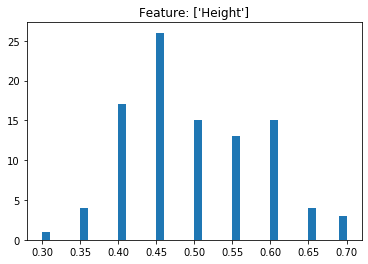

Feature =  ['Weight']
Correctly predicted = 10.141414
Accuracy 0.507071


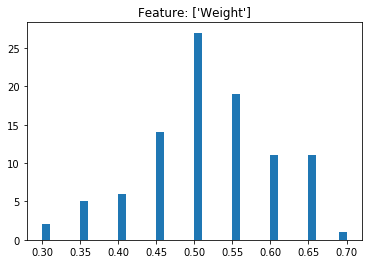

Feature =  ['iq']
Correctly predicted = 9.737374
Accuracy 0.486869


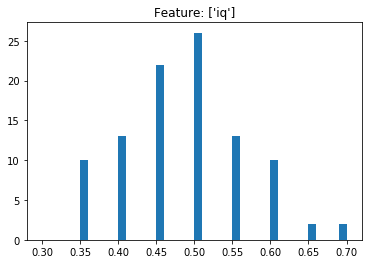

Feature =  ['Age']
Correctly predicted = 10.181818
Accuracy 0.509091


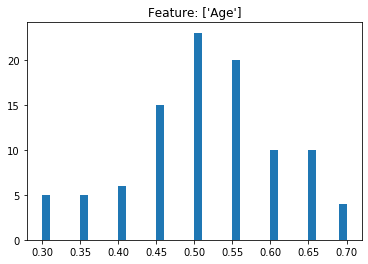

Feature =  ['Height', 'Weight']
Correctly predicted = 10.090909
Accuracy 0.504545


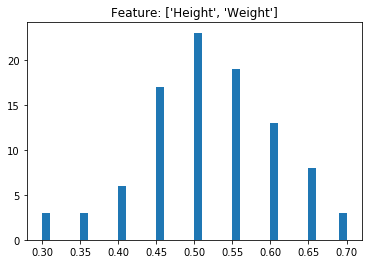

Feature =  ['Height', 'iq']
Correctly predicted = 9.838384
Accuracy 0.491919


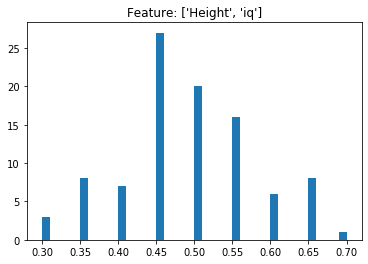

Feature =  ['Height', 'Age']
Correctly predicted = 9.767677
Accuracy 0.488384


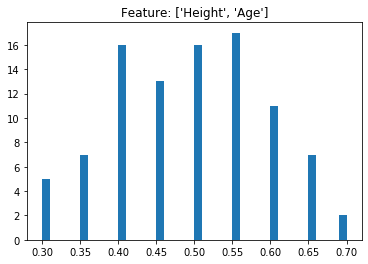

Feature =  ['Weight', 'iq']
Correctly predicted = 9.515152
Accuracy 0.475758


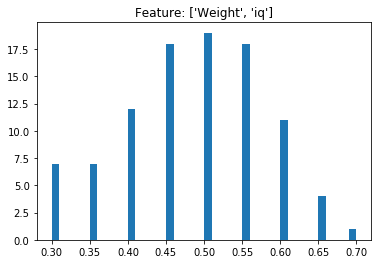

Feature =  ['Weight', 'Age']
Correctly predicted = 9.838384
Accuracy 0.491919


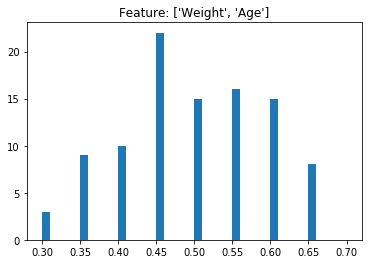

Feature =  ['iq', 'Age']
Correctly predicted = 9.929293
Accuracy 0.496465


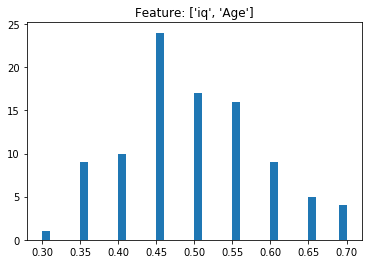

Feature =  ['Height', 'Weight', 'iq']
Correctly predicted = 9.919192
Accuracy 0.495960


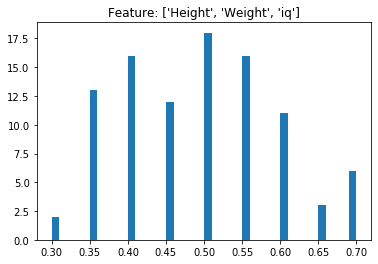

Feature =  ['Height', 'Weight', 'Age']
Correctly predicted = 10.010101
Accuracy 0.500505


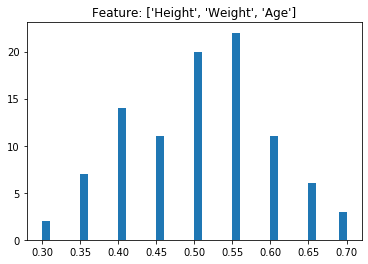

Feature =  ['Height', 'iq', 'Age']
Correctly predicted = 10.202020
Accuracy 0.510101


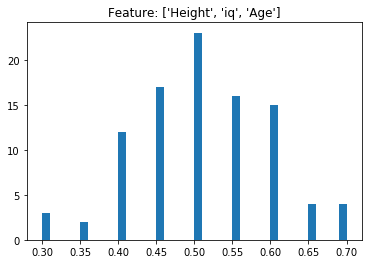

Feature =  ['Weight', 'iq', 'Age']
Correctly predicted = 9.787879
Accuracy 0.489394


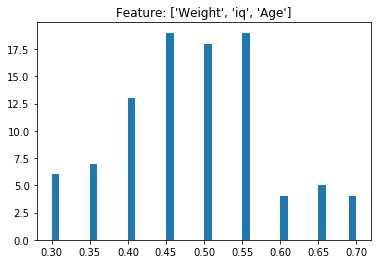

Feature =  ['Height', 'Weight', 'iq', 'Age']
Correctly predicted = 9.787879
Accuracy 0.489394


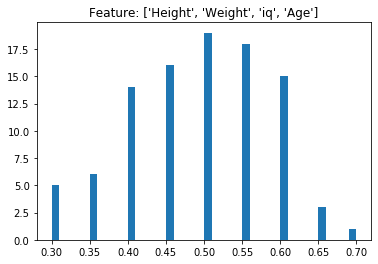

In [35]:
for f in combination:
    pred = []
    acc = []
    
    X = gender_df[f]
    y = gender_df['GenderNum']
    
    for i in np.arange(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
        s = y_test.shape
        baseline_rand = np.random.randint(0,1,size=s[0])
        pred.append((baseline_rand == y_test).sum())
        acc.append(accuracy_score(y_test, baseline_rand))
    
    print('Feature = ', f)
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))
    
    plt.title('Feature: ' + str(f))
    plt.hist(acc, range=(0.3,0.7), bins=40)
    plt.show()

## Majority baseline

Feature =  ['Height']
Correctly predicted = 9.878788
Accuracy 0.493939


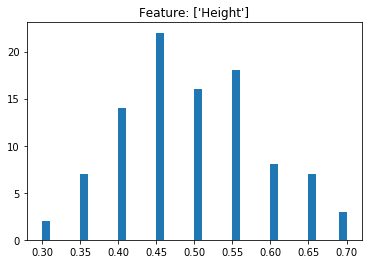

Feature =  ['Weight']
Correctly predicted = 10.252525
Accuracy 0.512626


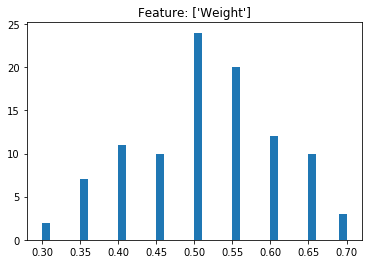

Feature =  ['iq']
Correctly predicted = 9.777778
Accuracy 0.488889


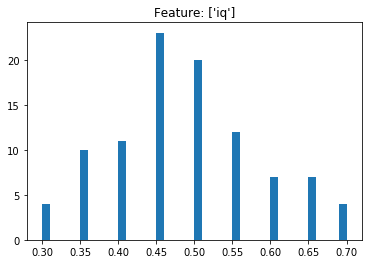

Feature =  ['Age']
Correctly predicted = 9.868687
Accuracy 0.493434


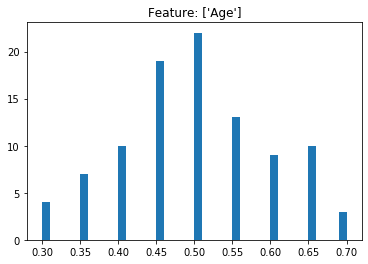

Feature =  ['Height', 'Weight']
Correctly predicted = 10.040404
Accuracy 0.502020


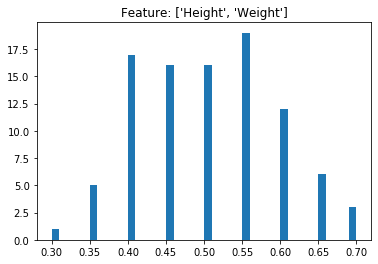

Feature =  ['Height', 'iq']
Correctly predicted = 10.232323
Accuracy 0.511616


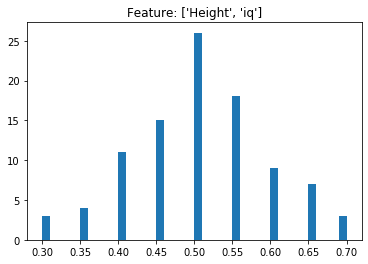

Feature =  ['Height', 'Age']
Correctly predicted = 9.979798
Accuracy 0.498990


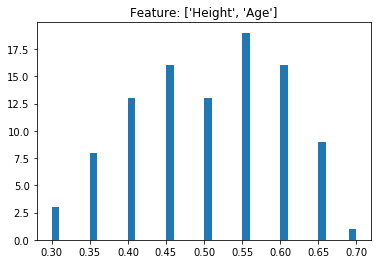

Feature =  ['Weight', 'iq']
Correctly predicted = 9.424242
Accuracy 0.471212


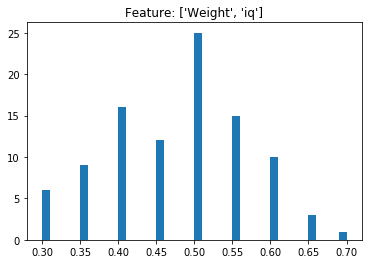

Feature =  ['Weight', 'Age']
Correctly predicted = 10.060606
Accuracy 0.503030


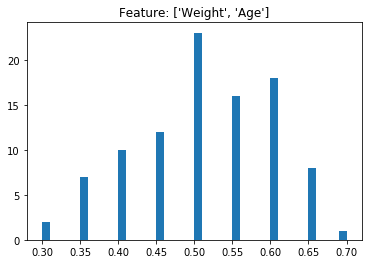

Feature =  ['iq', 'Age']
Correctly predicted = 10.040404
Accuracy 0.502020


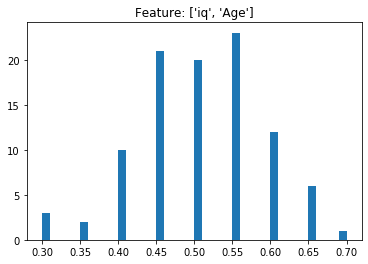

Feature =  ['Height', 'Weight', 'iq']
Correctly predicted = 9.848485
Accuracy 0.492424


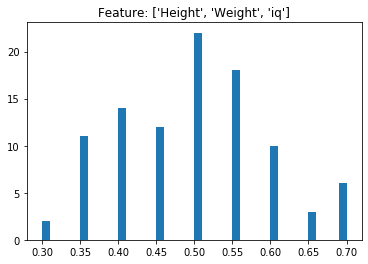

Feature =  ['Height', 'Weight', 'Age']
Correctly predicted = 10.111111
Accuracy 0.505556


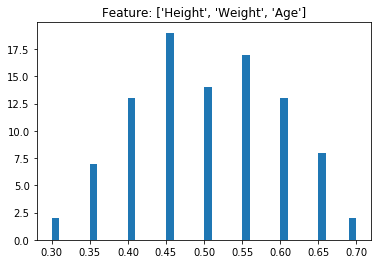

Feature =  ['Height', 'iq', 'Age']
Correctly predicted = 9.898990
Accuracy 0.494949


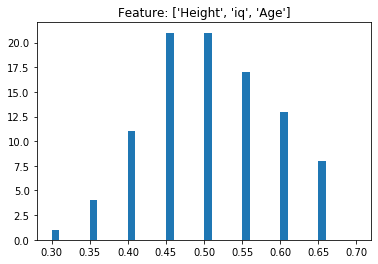

Feature =  ['Weight', 'iq', 'Age']
Correctly predicted = 10.070707
Accuracy 0.503535


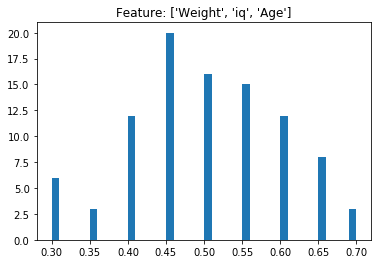

Feature =  ['Height', 'Weight', 'iq', 'Age']
Correctly predicted = 9.979798
Accuracy 0.498990


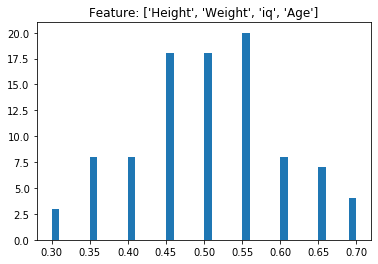

In [36]:
for f in combination:
    pred = []
    acc = []
    
    X = gender_df[f]
    y = gender_df['GenderNum']
    
    for i in np.arange(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
        s = y_test.shape
        baseline_rand = np.ones(s[0])
        pred.append((baseline_rand == y_test).sum())
        acc.append(accuracy_score(y_test, baseline_rand))
    
    print('Feature = ', f)
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))
    
    plt.title('Feature: ' + str(f))
    plt.hist(acc,range=(0.3,0.7), bins=40)
    plt.show()

##  Logistic regression 

Feature =  ['Height']
Correctly predicted = 8.020202
Accuracy 0.401010


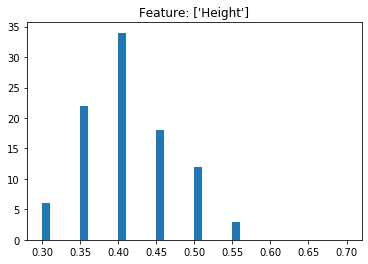

Feature =  ['Weight']
Correctly predicted = 8.090909
Accuracy 0.404545


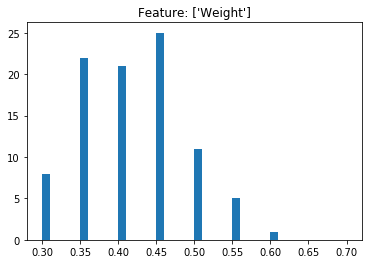

Feature =  ['iq']
Correctly predicted = 11.979798
Accuracy 0.598990


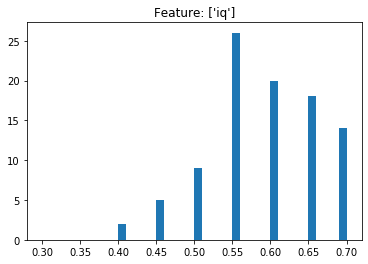

Feature =  ['Age']
Correctly predicted = 8.747475
Accuracy 0.437374


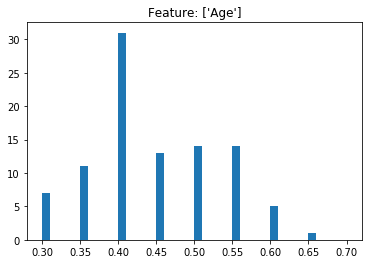

Feature =  ['Height', 'Weight']
Correctly predicted = 7.575758
Accuracy 0.378788


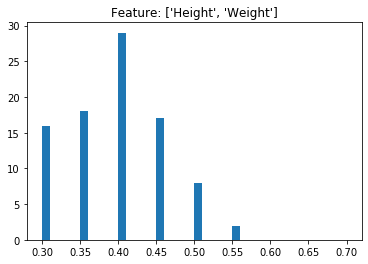

Feature =  ['Height', 'iq']
Correctly predicted = 11.242424
Accuracy 0.562121


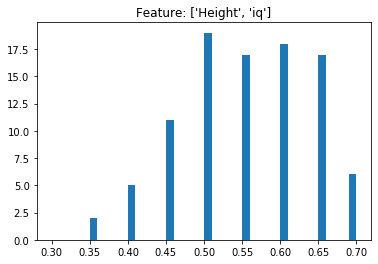

Feature =  ['Height', 'Age']
Correctly predicted = 7.979798
Accuracy 0.398990


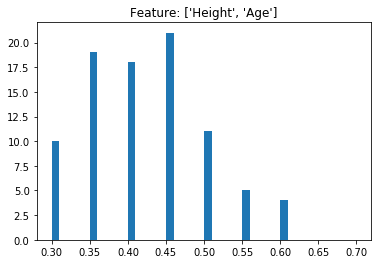

Feature =  ['Weight', 'iq']
Correctly predicted = 11.595960
Accuracy 0.579798


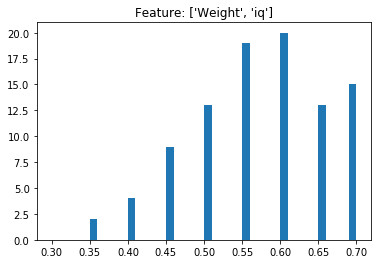

Feature =  ['Weight', 'Age']
Correctly predicted = 8.101010
Accuracy 0.405051


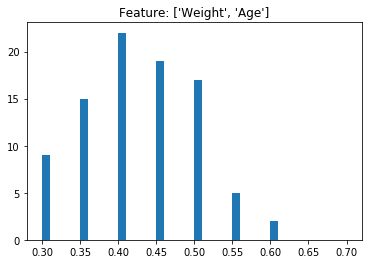

Feature =  ['iq', 'Age']
Correctly predicted = 12.131313
Accuracy 0.606566


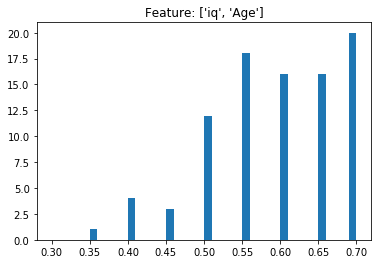

Feature =  ['Height', 'Weight', 'iq']
Correctly predicted = 11.313131
Accuracy 0.565657


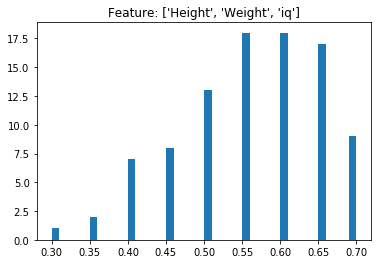

Feature =  ['Height', 'Weight', 'Age']
Correctly predicted = 7.888889
Accuracy 0.394444


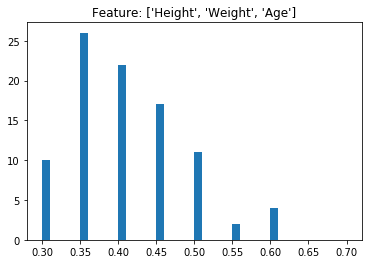

Feature =  ['Height', 'iq', 'Age']
Correctly predicted = 11.636364
Accuracy 0.581818


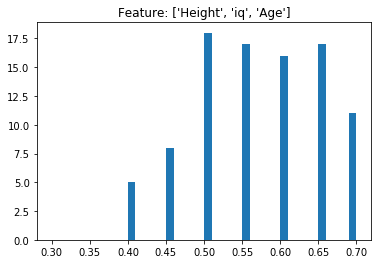

Feature =  ['Weight', 'iq', 'Age']
Correctly predicted = 11.656566
Accuracy 0.582828


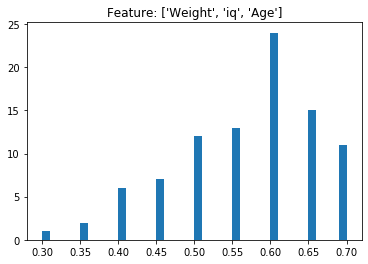

Feature =  ['Height', 'Weight', 'iq', 'Age']
Correctly predicted = 11.404040
Accuracy 0.570202


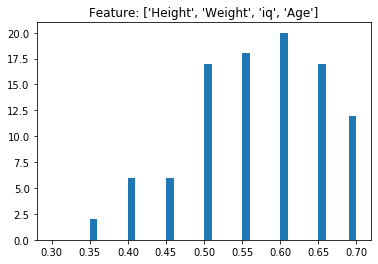

In [39]:
for f in combination:
    pred = []
    acc = []
    
    X = gender_df[f]
    y = gender_df['GenderNum']
    
    for i in np.arange(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
        
        lr = LogisticRegression(solver ='lbfgs')
        lr.fit(X_train, y_train.values.ravel())
        y_pred = lr.predict(X_test)
        
        pred.append((y_test.values == y_pred).sum())
        acc.append(accuracy_score(y_test, y_pred))
    
    print('Feature = ', f)
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))
    
    plt.title('Feature: ' + str(f))
    plt.hist(acc,range=(0.3,0.7), bins=40)
    plt.show()